## Pandas Time Series Exercise Set #1

For this set of exercises we'll use a dataset containing monthly milk production values in pounds per cow from January 1962 to December 1975.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [1]:
# RUN THIS CELL
import pandas as pd
%matplotlib inline

df = pd.read_csv('../Data/monthly_milk_production.csv', encoding='utf8')

print(len(df))
print(df.head())

168
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727


So <tt>df</tt> has 168 records and 2 columns.

### 1. What is the current data type of the Date column?
HINT: We show how to list column dtypes in the first set of DataFrame lectures.

In [2]:
# CODE HERE
df.dtypes

Date          object
Production     int64
dtype: object

### 2. Change the Date column to a datetime format

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

### 3. Set the Date column to be the new index

In [5]:
df.set_index('Date',inplace=True)

In [6]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


### 4. Plot the DataFrame with a simple line plot. What do you notice about the plot?

<AxesSubplot:xlabel='Date'>

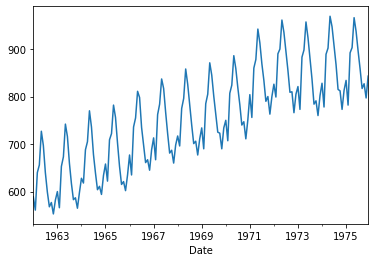

In [7]:
df['Production'].plot()

**Observation**:
* Production is increasing year by year.

### 5. Add a column called 'Month' that takes the month value from the index
HINT: You have to call <tt>df.index</tt> as <tt>df['Date']</tt> won't work.

<strong>BONUS: See if you can obtain the <em>name</em> of the month instead of a number!</strong>

In [8]:
df['Month'] = df.index.month

In [9]:
df['Month_Name'] = df.index.month_name()

In [10]:
df.head()

,Production,Month,Month_Name
Date,,,
1962-01-01,589,1,January
1962-02-01,561,2,February
1962-03-01,640,3,March
1962-04-01,656,4,April
1962-05-01,727,5,May


### 6. Create a BoxPlot that groups by the Month field

<AxesSubplot:title={'center':'Production'}, xlabel='[Month]'>

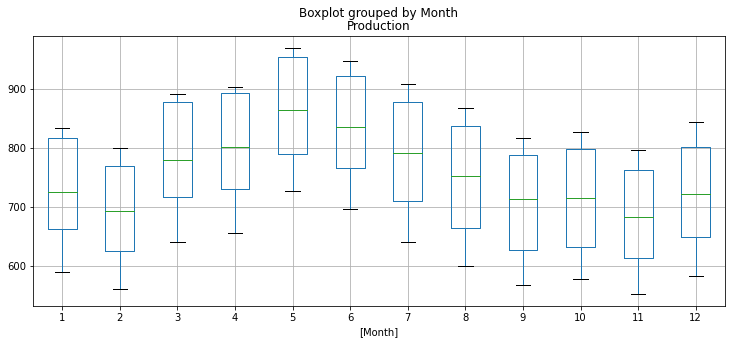

In [11]:
df.boxplot(by='Month', figsize=(12,5))

## Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Read in the data UMTMVS.csv file from the Data folder**

In [12]:
df = pd.read_csv('../Data/UMTMVS.csv')

**Check the head of the data**

In [13]:
# CODE HERE
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**Set the DATE column as the index.**

In [14]:
# CODE HERE
df.set_index('DATE', inplace = True)

In [15]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Check the data type of the index.**

In [16]:
# CODE HERE
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [17]:
# CODE HERE
df.index = pd.to_datetime(df.index)

In [18]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

<AxesSubplot:xlabel='DATE'>

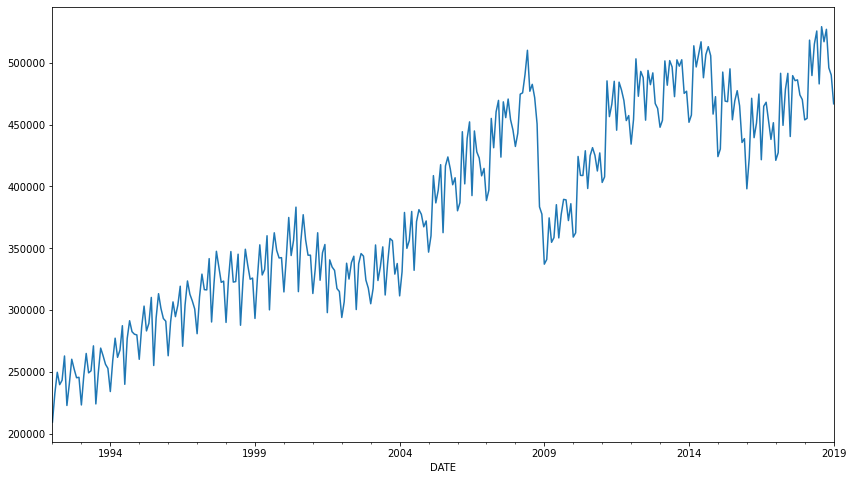

In [19]:
# CODE HERE
df['UMTMVS'].plot(figsize = (14,8))

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [20]:
#CODE HERE
(df.loc['2019-01-01']/df.loc['2009-01-01']-1)*100

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [21]:
((df.loc['2009-01-01']-df.loc['2008-01-01'])/df.loc['2008-01-01'])*100

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [22]:
#CODE HERE
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [23]:
# CODE HERE
df.sort_values(by = 'UMTMVS', ascending=False)[:5]

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [24]:
# CODE HERE
df.loc['2008-01-01']-df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

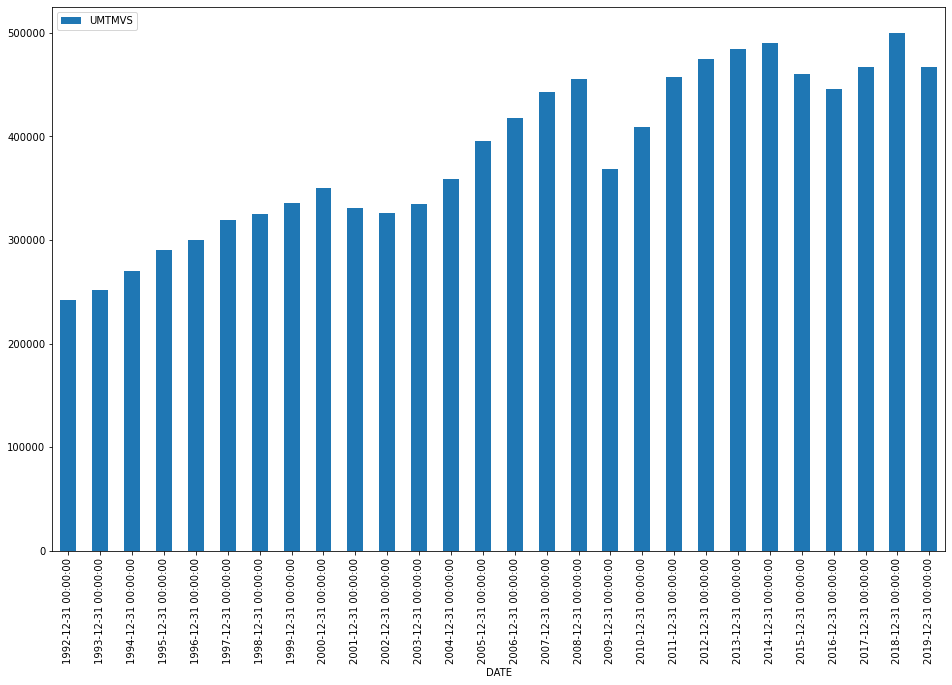

In [25]:
# CODE HERE
df.resample(rule = 'A').mean().plot.bar(figsize=(16,10)).legend(loc='upper left')

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [26]:
df.resample(rule = 'A').mean().head(5)

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

In [27]:
df['Yearly Mean'] = df.rolling(window=12).mean()

<AxesSubplot:xlabel='DATE'>

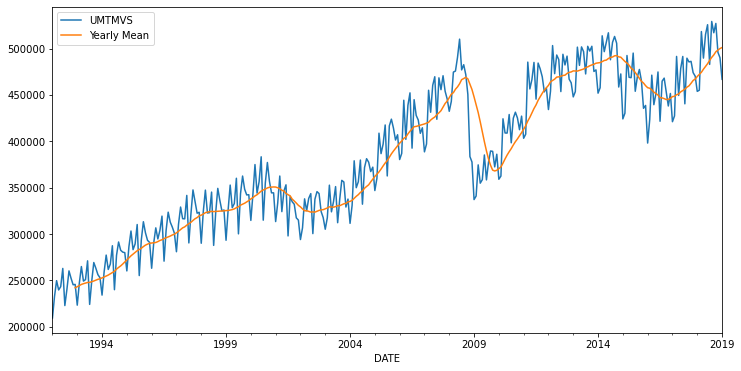

In [28]:
# CODE HERE
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,6))


**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [29]:
#CODE HERE
#Getting the maximum value in 2008 period
maxi = df.loc[:'2009-01-01']['UMTMVS'].max()

maxi_index = df.loc[:'2009-01-01']['UMTMVS'].idxmax()

maxi_index,maxi

(Timestamp('2008-06-01 00:00:00'), 510081.0)

In [30]:
#Filtering the index date after 2009
df_fil = df.loc['2009-01-01':,'UMTMVS']

In [31]:
#Getting the date when it surpassed the 2008 highest value

maxi_post = df_fil[df_fil>maxi].index[0]

maxi_post

Timestamp('2014-03-01 00:00:00')

In [32]:
#how many did it take to surpass
df.loc[maxi_index:maxi_post].shape[0]

70